In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile as zf
import itertools as i
import seaborn as sns

# Data Visualization and Exploratory Data Analysis Lab
## Visualizing and exploring data. The data mining process

In this lab, you'll get acquainted with the most streamed songs on Spotify in 2024. The dataset and its associated metadata can be found [here](https://www.kaggle.com/datasets/nelgiriyewithana/most-streamed-spotify-songs-2024). The version you'll need is provided in the `data/` folder.

You know the drill. Do what you can / want / need to answer the questions to the best of your ability. Answers do not need to be trivial, or even the same among different people.

### Problem 1. Read the dataset (1 point)
Read the file without unzipping it first. You can try a different character encoding, like `unicode_escape`. Don't worry too much about weird characters.

In [3]:
with zf.ZipFile("./data/spotify_most_streamed_2024.zip") as z:
    with z.open('Most Streamed Spotify Songs 2024.csv') as f:
        spotify_data = pd.read_csv(f, encoding='unicode_escape')

spotify_data

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,For the Last Time,For the Last Time,$uicideboy$,9/5/2017,QM8DG1703420,"4,585",19.4,"305,049,963","65,770","5,103,054",...,NaN,2.0,"14,217",NaN,"20,104,066","13,184","50,633,006","656,337",NaN,1
4596,Dil Meri Na Sune,"Dil Meri Na Sune (From ""Genius"")",Atif Aslam,7/27/2018,INT101800122,"4,575",19.4,"52,282,360","4,602","1,449,767",...,NaN,1.0,927,NaN,NaN,NaN,NaN,"193,590",NaN,0
4597,Grace (feat. 42 Dugg),My Turn,Lil Baby,2/28/2020,USUG12000043,"4,571",19.4,"189,972,685","72,066","6,704,802",...,NaN,1.0,74,6.0,"84,426,740","28,999",NaN,"1,135,998",NaN,1
4598,Nashe Si Chadh Gayi,November Top 10 Songs,Arijit Singh,11/8/2016,INY091600067,"4,591",19.4,"145,467,020","14,037","7,387,064",...,NaN,NaN,NaN,7.0,"6,817,840",NaN,NaN,"448,292",NaN,0


In [4]:
spotify_data.shape

(4600, 29)

In [5]:
spotify_data.dtypes

Track                          object
Album Name                     object
Artist                         object
Release Date                   object
ISRC                           object
All Time Rank                  object
Track Score                   float64
Spotify Streams                object
Spotify Playlist Count         object
Spotify Playlist Reach         object
Spotify Popularity            float64
YouTube Views                  object
YouTube Likes                  object
TikTok Posts                   object
TikTok Likes                   object
TikTok Views                   object
YouTube Playlist Reach         object
Apple Music Playlist Count    float64
AirPlay Spins                  object
SiriusXM Spins                 object
Deezer Playlist Count         float64
Deezer Playlist Reach          object
Amazon Playlist Count         float64
Pandora Streams                object
Pandora Track Stations         object
Soundcloud Streams             object
Shazam Count

### Problem 2. Perform some cleaning (1 point)
Ensure all data has been read correctly; check the data types. Give the columns better names (e.g. `all_time_rank`, `track_score`, etc.). To do so, try to use `apply()` instead of a manual mapping between old and new name. Get rid of any unnecessary ones.

In [6]:
spotify_data.shape

(4600, 29)

In [7]:
spotify_data.columns = (
    spotify_data.columns
        .str.strip()
        .str.lower()
        .str.replace(r"[ \-]+", "_", regex=True)
        .str.replace(r"_+", "_", regex=True)
)

In [8]:
spotify_data.dtypes

track                          object
album_name                     object
artist                         object
release_date                   object
isrc                           object
all_time_rank                  object
track_score                   float64
spotify_streams                object
spotify_playlist_count         object
spotify_playlist_reach         object
spotify_popularity            float64
youtube_views                  object
youtube_likes                  object
tiktok_posts                   object
tiktok_likes                   object
tiktok_views                   object
youtube_playlist_reach         object
apple_music_playlist_count    float64
airplay_spins                  object
siriusxm_spins                 object
deezer_playlist_count         float64
deezer_playlist_reach          object
amazon_playlist_count         float64
pandora_streams                object
pandora_track_stations         object
soundcloud_streams             object
shazam_count

In [9]:
spotify_data.tidal_popularity.value_counts(dropna = False)             

tidal_popularity
NaN    4600
Name: count, dtype: int64

tidal_popularity is an unnecessary column - we drop it

In [10]:
spotify_data = spotify_data.drop(columns=['tidal_popularity'])

In [11]:
spotify_data.dtypes

track                          object
album_name                     object
artist                         object
release_date                   object
isrc                           object
all_time_rank                  object
track_score                   float64
spotify_streams                object
spotify_playlist_count         object
spotify_playlist_reach         object
spotify_popularity            float64
youtube_views                  object
youtube_likes                  object
tiktok_posts                   object
tiktok_likes                   object
tiktok_views                   object
youtube_playlist_reach         object
apple_music_playlist_count    float64
airplay_spins                  object
siriusxm_spins                 object
deezer_playlist_count         float64
deezer_playlist_reach          object
amazon_playlist_count         float64
pandora_streams                object
pandora_track_stations         object
soundcloud_streams             object
shazam_count

In [12]:
spotify_data.release_date.value_counts(dropna = False)   

release_date
1/1/2012      38
1/1/2013      34
4/12/2024     29
1/1/2014      28
10/13/2023    28
              ..
4/6/2022       1
9/21/2021      1
3/19/2024      1
5/4/2024       1
4/11/2017      1
Name: count, Length: 1562, dtype: int64

Release date column should be of type datetime

In [13]:
spotify_data.release_date = pd.to_datetime(spotify_data.release_date, errors='coerce',
    dayfirst=False)

In [14]:
spotify_data.dtypes

track                                 object
album_name                            object
artist                                object
release_date                  datetime64[ns]
isrc                                  object
all_time_rank                         object
track_score                          float64
spotify_streams                       object
spotify_playlist_count                object
spotify_playlist_reach                object
spotify_popularity                   float64
youtube_views                         object
youtube_likes                         object
tiktok_posts                          object
tiktok_likes                          object
tiktok_views                          object
youtube_playlist_reach                object
apple_music_playlist_count           float64
airplay_spins                         object
siriusxm_spins                        object
deezer_playlist_count                float64
deezer_playlist_reach                 object
amazon_pla

In [15]:
spotify_data.all_time_rank.value_counts(dropna = False)   

all_time_rank
355      2
1,103    2
1,807    2
2,192    2
626      2
        ..
4,585    1
4,575    1
4,571    1
4,591    1
4,553    1
Name: count, Length: 4577, dtype: int64

In [16]:
spotify_data.spotify_streams.value_counts(dropna = False)

spotify_streams
NaN              113
1,655,575,417      4
1,642,258,500      3
111,155,129        2
1,431,126,152      2
                ... 
3,301,814,535      1
91,272,461         1
1,258,569,694      1
395,433,400        1
42,735,162         1
Name: count, Length: 4426, dtype: int64

In [17]:
spotify_data.spotify_playlist_count.value_counts(dropna = False)

spotify_playlist_count
NaN       70
1         46
2         24
3         19
5         18
          ..
65,770     1
4,602      1
72,066     1
14,037     1
32,138     1
Name: count, Length: 4208, dtype: int64

In [18]:
spotify_data.spotify_playlist_reach.value_counts(dropna = False)

spotify_playlist_reach
NaN          72
3             8
1             7
2             6
4             6
             ..
5,103,054     1
1,449,767     1
6,704,802     1
7,387,064     1
6,879,843     1
Name: count, Length: 4479, dtype: int64

In [19]:
spotify_data.youtube_views.value_counts(dropna = False)

youtube_views
NaN              308
30,913,276         2
828,853,696        2
257,045,287        1
116,347,040        1
                ... 
149,247,747        1
943,920,245        1
201,027,333        1
1,118,595,159      1
122,599,116        1
Name: count, Length: 4291, dtype: int64

In [20]:
spotify_data.youtube_likes.value_counts(dropna = False)

youtube_likes
NaN          315
159,791        2
3,086,157      2
466,288        1
1,456,177      1
            ... 
1,397,590      1
5,347,766      1
1,081,402      1
3,868,828      1
1,307,290      1
Name: count, Length: 4284, dtype: int64

In [21]:
spotify_data.tiktok_posts.value_counts(dropna = False)

tiktok_posts
NaN           1173
1,800,000        6
1,100,000        6
1,600,000        4
2,100,000        4
              ... 
1,470,500        1
9,453,333        1
37,621,885       1
7,485,966        1
7,189,811        1
Name: count, Length: 3319, dtype: int64

In [22]:
spotify_data.tiktok_likes.value_counts(dropna = False)

tiktok_likes
NaN            980
14,000           2
1,800,000        2
42               2
13,324,305       2
              ... 
1,088            1
521,725,116      1
25,348,800       1
419,319,161      1
119,740,900      1
Name: count, Length: 3616, dtype: int64

In [23]:
spotify_data.tiktok_views.value_counts(dropna = False)

tiktok_views
NaN              981
1,200,000          2
117,505,652        2
158,504,854        2
4,591,851          1
                ... 
7,499,234,052      1
207,317,000        1
5,456,156,211      1
1,225,345,800      1
208,339,025        1
Name: count, Length: 3617, dtype: int64

In [24]:
spotify_data.airplay_spins.value_counts(dropna = False)

airplay_spins
NaN          498
1             69
2             48
3             33
8             23
            ... 
129,968        1
667,329        1
569,287        1
1,777,811      1
88,924         1
Name: count, Length: 3268, dtype: int64

In [25]:
spotify_data.siriusxm_spins.value_counts(dropna = False)

siriusxm_spins
NaN      2123
1          54
2          52
4          45
3          43
         ... 
858         1
345         1
1,319       1
2,355       1
337         1
Name: count, Length: 690, dtype: int64

In [26]:
spotify_data.deezer_playlist_reach.value_counts(dropna = False)

deezer_playlist_reach
NaN           928
1,097          17
1,566,667       7
72              5
91,280          5
             ... 
13,718,632      1
41,414,565      1
40,725,482      1
26,516,005      1
24,684,248      1
Name: count, Length: 3559, dtype: int64

In [27]:
spotify_data.pandora_streams.value_counts(dropna = False)

pandora_streams
NaN            1106
56,972,562        2
6,723,858         2
2,829             2
293,997,575       1
               ... 
44,850,379        1
283,089           1
132,624,772       1
70,291,476        1
202,437,193       1
Name: count, Length: 3492, dtype: int64

In [28]:
spotify_data.pandora_track_stations.value_counts(dropna = False)

pandora_track_stations
NaN       1268
9            6
2            5
12           5
880          4
          ... 
1,219        1
18,364       1
13,242       1
13,437       1
12,270       1
Name: count, Length: 2976, dtype: int64

In [29]:
spotify_data.soundcloud_streams.value_counts(dropna=False)

soundcloud_streams
NaN           3333
27               2
1,336,043        2
3,089,649        1
2,528,450        1
              ... 
49,145,984       1
3,910,975        1
96,009           1
8,141,454        1
6,049,784        1
Name: count, Length: 1266, dtype: int64

In [30]:
spotify_data.shazam_counts.value_counts(dropna=False)

shazam_counts
NaN           577
1               5
7               3
5               3
3               3
             ... 
2,765,808       1
1,210,029       1
6,973,652       1
257,661         1
14,967,379      1
Name: count, Length: 4003, dtype: int64

In [31]:
spotify_data.youtube_playlist_reach.value_counts(dropna=False)

youtube_playlist_reach
NaN              1009
381,728            13
2,606,582           7
19,904,542          7
45,212,529          6
                 ... 
268,893,710         1
2,667,285,437       1
5,839,168           1
7,289,707,052       1
1,063,591,802       1
Name: count, Length: 3459, dtype: int64

Before applying any cleaning functions, I inspect the value counts of 17 numerical columns related to streaming and playlist metrics across different platforms. I can see that many of these values are stored as strings due to the presence of formatting characters like commas (e.g. "1,103"), or are empty strings, 'nan', or 'NA' which prevent proper numerical interpretation. Also, there are some inconsistencies in how missing values are represented. I decided to apply a cleaning function to each of these columns. This function removes commas and whitespace, replaces invalid or missing entries with pd.NA, and converts the result to the appropriate numerical type (Int64).

In [32]:
def clean_numeric_columns(df, columns):
   
    """
    Cleans the specified columns in the DataFrame by:
      - Removing commas
      - Stripping whitespace
      - Converting empty strings and common placeholders to NA
      - Coercing to numeric
      - Casting to pandas nullable Int64 type
    Modifies df in place.
    """
    
    for col in columns:
        df[col] = (
            df[col]
              .astype(str)
              .str.replace(',', '', regex=False)
              .str.strip()
              .replace({'': pd.NA, 'nan': pd.NA, 'NA': pd.NA})
              .pipe(pd.to_numeric, errors='coerce')
              .astype('Int64')
        )

In [33]:
columns_to_clean = [
    'all_time_rank', 'spotify_streams', 'spotify_playlist_count', 'spotify_playlist_reach',
    'youtube_views', 'youtube_likes', 'tiktok_posts', 'tiktok_likes', 'tiktok_views',
    'airplay_spins', 'siriusxm_spins', 'deezer_playlist_reach', 'pandora_streams',
    'pandora_track_stations', 'soundcloud_streams', 'shazam_counts', 'youtube_playlist_reach'
]

clean_numeric_columns(spotify_data, columns_to_clean)

In [34]:
spotify_data.dtypes

track                                 object
album_name                            object
artist                                object
release_date                  datetime64[ns]
isrc                                  object
all_time_rank                          Int64
track_score                          float64
spotify_streams                        Int64
spotify_playlist_count                 Int64
spotify_playlist_reach                 Int64
spotify_popularity                   float64
youtube_views                          Int64
youtube_likes                          Int64
tiktok_posts                           Int64
tiktok_likes                           Int64
tiktok_views                           Int64
youtube_playlist_reach                 Int64
apple_music_playlist_count           float64
airplay_spins                          Int64
siriusxm_spins                         Int64
deezer_playlist_count                float64
deezer_playlist_reach                  Int64
amazon_pla

In [35]:
spotify_data.artist.value_counts(dropna = False)

artist
Drake            63
Taylor Swift     63
Bad Bunny        60
KAROL G          32
The Weeknd       31
                 ..
Jaques Raupï¿     1
Kerim Araz        1
Steps             1
Serranow          1
SR                1
Name: count, Length: 2000, dtype: int64

In [36]:
spotify_data.track.value_counts(dropna = False)

track
Danza Kuduro - Cover               13
Cake By The Ocean - Cover           9
ýýýýýýýýýýýý                        7
ýýýýýý                              6
Flowers                             4
                                   ..
For the Last Time                   1
Dil Meri Na Sune                    1
Grace (feat. 42 Dugg)               1
Nashe Si Chadh Gayi                 1
Me Acostumbre (feat. Bad Bunny)     1
Name: count, Length: 4370, dtype: int64

In [37]:
spotify_data.album_name.value_counts(dropna = False)

album_name
Un Verano Sin Ti                                           20
THE TORTURED POETS DEPARTMENT                              18
nadie sabe lo que va a pasar maï¿½ï¿                       16
For All The Dogs                                           15
UTOPIA                                                     15
                                                           ..
What Was I Made For? (From The Motion Picture "Barbie")     1
Black Book ID's: Chapter 5 - EP                             1
As It Was                                                   1
Heat Waves                                                  1
Me Acostumbre (feat. Bad Bunny)                             1
Name: count, Length: 4005, dtype: int64

In my opinion, the dataset is now cleaned!

### Problem 3. Most productive artists (1 point)
Who are the five artists with the most songs in the dataset?

Who are the five "clean-mouthed" artists (i.e., with no explicit songs)? **Note:** We're not going into details but we can start a discussion about whether a song needs swearing to be popular.

In [38]:
spotify_data.artist = spotify_data.artist.str.strip()

In [39]:
artist_counts = spotify_data.artist.value_counts()
top_artists = artist_counts.head(5)

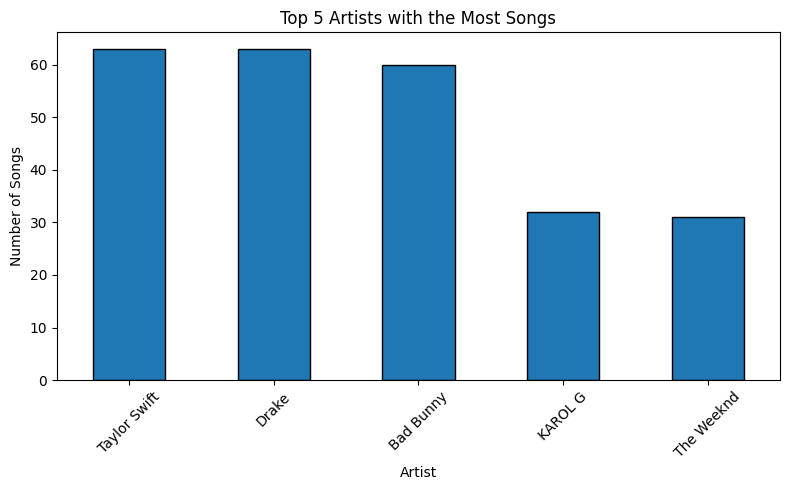

In [40]:
plt.figure(figsize=(8, 5))
top_artists.plot(kind='bar', edgecolor='black')
plt.title('Top 5 Artists with the Most Songs')
plt.xlabel('Artist')
plt.ylabel('Number of Songs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

We only consider artists with zero explicit tracks, so our “clean‑mouthed” list truly has no swearing at all. We impose a minimum catalog size (here, 10 tracks) to avoid crowning one‑hit wonders. This prevents an artist with a single clean track from outranking someone with a rich, mostly clean catalog. Requiring >= 10 tracks reduces the candidate pool, ensuring we only pick artists with a substantial presence. Among those fully clean with >= 10 tracks, sorting by total_songs guarantees the artists we pick are not only pure but also prolific.

In [41]:
artist_stats = (
    spotify_data
      .groupby('artist')['explicit_track']
      .agg(
        total_songs='count',
        explicit_songs='sum'
      )
      .assign(
        clean_songs=lambda df: df['total_songs'] - df['explicit_songs'],
        clean_ratio=lambda df: df['clean_songs'] / df['total_songs']
      )
)

artist_stats = artist_stats[artist_stats['total_songs'] >= 10]

top_clean = artist_stats.sort_values(
    'clean_ratio', ascending=False
).head(5)

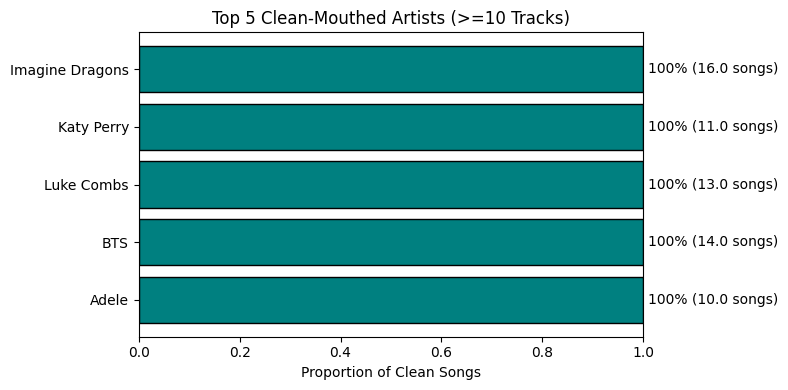

In [42]:
plt.figure(figsize=(8, 4))
bars = plt.barh(
    top_clean.index,
    top_clean['clean_ratio'],
    color='teal',
    edgecolor='black'
)
plt.xlim(0, 1)
plt.xlabel('Proportion of Clean Songs')
plt.title('Top 5 Clean‑Mouthed Artists (>=10 Tracks)')

for bar, (_, row) in zip(bars, top_clean.iterrows()):
    pct = f"{row['clean_ratio']:.0%}"
    plt.text(
        row['clean_ratio'] + 0.01,
        bar.get_y() + bar.get_height()/2,
        f"{pct} ({row['total_songs']} songs)",
        va='center'
    )

plt.tight_layout()
plt.show()

### Problem 4. Most streamed artists (1 point)
And who are the top five most streamed (as measured by Spotify streams) artists?

In [43]:
top_streamed_artists = (
    spotify_data
    .groupby('artist')
    .spotify_streams
    .sum()
    .sort_values(ascending=False)
    .head(5)
)

top_streamed_artists

artist
Bad Bunny       37054834425
The Weeknd      36948540278
Drake           34962157577
Taylor Swift    34470771165
Post Malone     26137472958
Name: spotify_streams, dtype: Int64

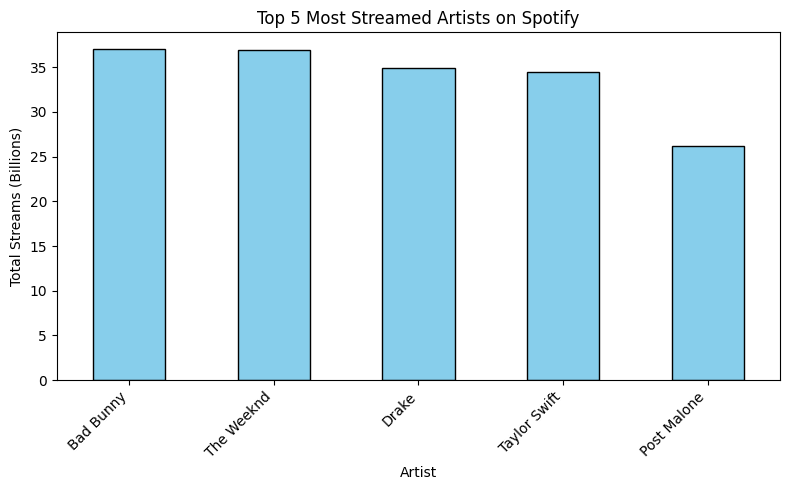

In [44]:
# Convert streams to billions for readability
top_streamed_b = top_streamed_artists / 1000000000

fig, ax = plt.subplots(figsize=(8, 5))
top_streamed_b.plot(kind='bar', color='skyblue', edgecolor='black', ax=ax)
ax.set_title('Top 5 Most Streamed Artists on Spotify')
ax.set_xlabel('Artist')
ax.set_ylabel('Total Streams (Billions)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Problem 5. Songs by year and month (1 point)
How many songs have been released each year? Present an appropriate plot. Can you explain the behavior of the plot for 2024?

How about months? Is / Are there (a) popular month(s) to release music?

In [45]:
release_years = spotify_data.release_date.dt.year
year_counts = release_years.value_counts().sort_index()
year_counts

release_date
1987       1
1991       1
1994       1
1998       1
1999       1
2000       2
2001       1
2002       5
2003       3
2004       5
2005       5
2006       3
2007       5
2008      11
2009      15
2010      27
2011      51
2012      47
2013      55
2014      70
2015      96
2016     123
2017     213
2018     249
2019     296
2020     360
2021     408
2022     694
2023    1158
2024     693
Name: count, dtype: int64

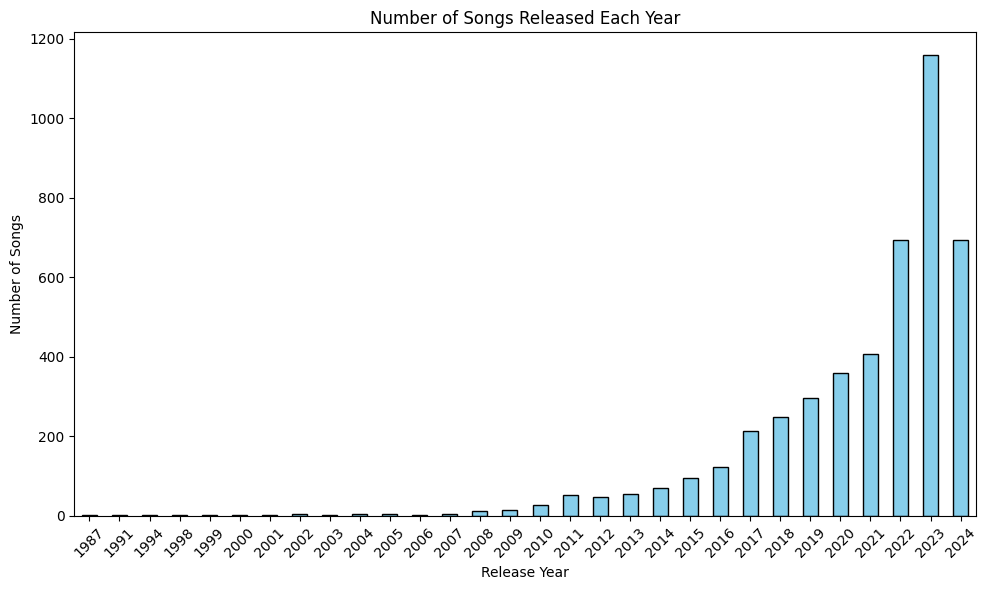

In [46]:
plt.figure(figsize=(10, 6))
year_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Songs Released Each Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Songs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

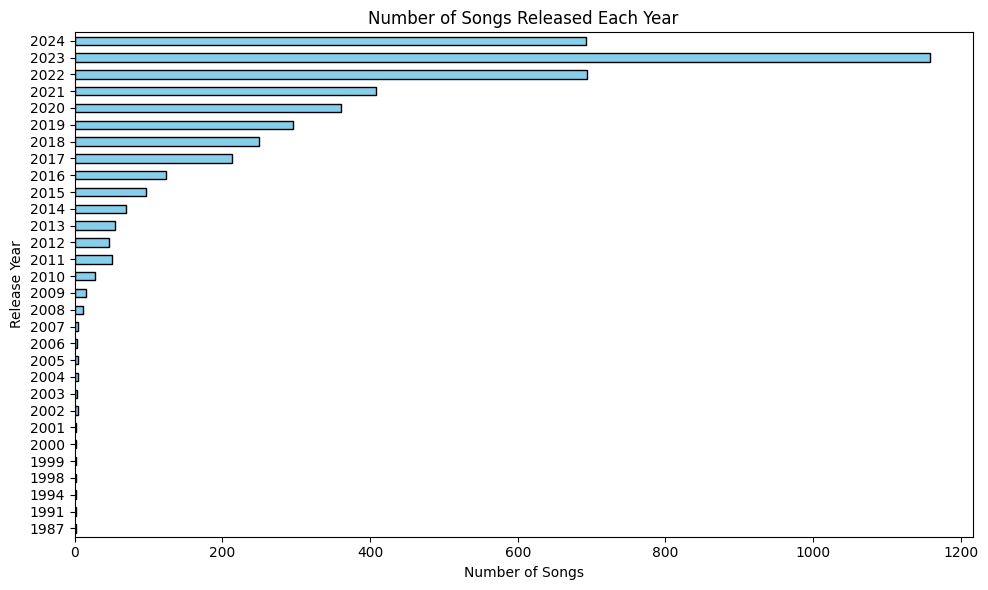

In [47]:
plt.figure(figsize=(10, 6))
year_counts.plot(kind='barh', color='skyblue', edgecolor='black')
plt.title('Number of Songs Released Each Year')
plt.xlabel('Number of Songs')
plt.ylabel('Release Year')
plt.tight_layout()
plt.show()

The bar chart (perfect choice for our task) shows the number of songs in the dataset by their release year. There is a steady growth from the early 2000s. There is a peak around 2023 (nearly 1200 songs). Most tracks released in 2024 have only been out for a few months (or even weeks), so they haven't yet had time to rack up the hundreds of millions (or billions) of plays needed to make this "most streamed" list. Also, this ranking was compiled at a fixed point in late 2024. Any song released after that cut-off - even if wildly popular - won't appear here.

In [48]:
release_months = spotify_data.release_date.dt.month_name()

months_order = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]

month_counts = release_months.value_counts().reindex(months_order).fillna(0)
month_counts

release_date
January      503
February     371
March        430
April        420
May          511
June         395
July         321
August       315
September    328
October      384
November     350
December     272
Name: count, dtype: int64

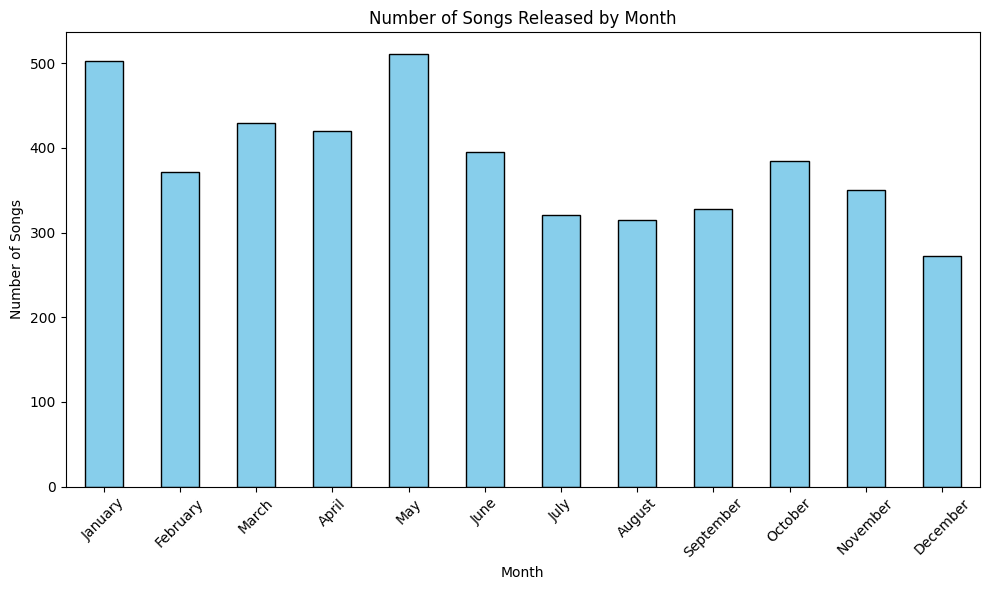

In [49]:
plt.figure(figsize=(10, 6))
month_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Songs Released by Month')
plt.xlabel('Month')
plt.ylabel('Number of Songs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

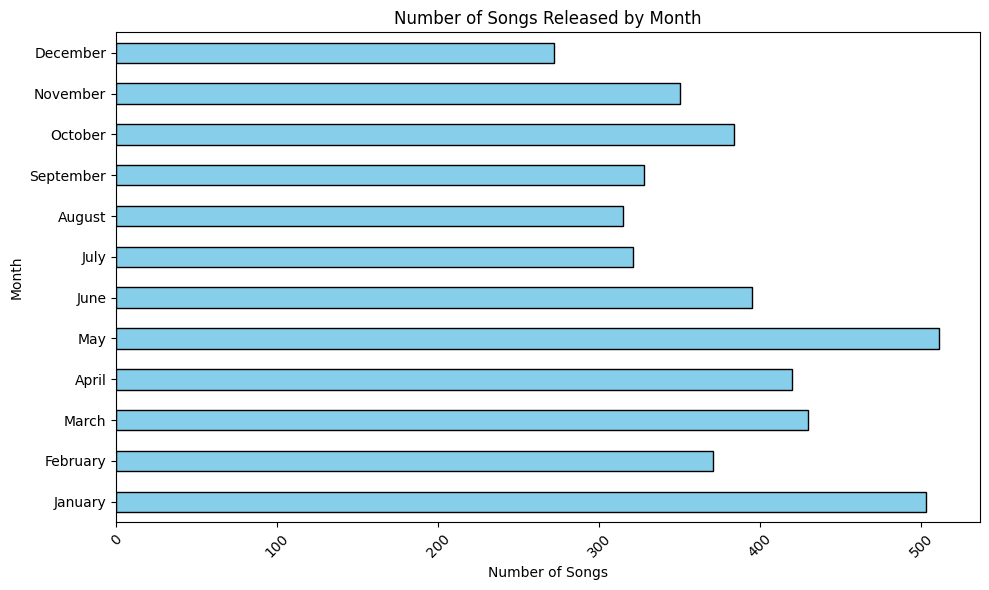

In [50]:
plt.figure(figsize=(10, 6))
month_counts.plot(kind='barh', color='skyblue', edgecolor='black')
plt.title('Number of Songs Released by Month')
plt.ylabel('Month')
plt.xlabel('Number of Songs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The bar chart (again - preferable choice) above shows how many songs in our "most streamed" dataset were released in each month. May and January (both over 500 songs) lead the pack - spring and post-holiday release cycles appear strong. October, June and March also see high counts, lowest counts occur in December (under 300 songs) and August (a little over 300 songs), likely due to holiday season focus and summer breaks.

### Problem 6. Playlists (2 points)
Is there any connection (correlation) between users adding a song to playlists in one service, or another? Only Spotify, Apple, Deezer, and Amazon offer the ability to add a song to a playlist. Find a way to plot all these relationships at the same time, and analyze them. Experiment with different types of correlations.

In [51]:
spotify_data.dtypes

track                                 object
album_name                            object
artist                                object
release_date                  datetime64[ns]
isrc                                  object
all_time_rank                          Int64
track_score                          float64
spotify_streams                        Int64
spotify_playlist_count                 Int64
spotify_playlist_reach                 Int64
spotify_popularity                   float64
youtube_views                          Int64
youtube_likes                          Int64
tiktok_posts                           Int64
tiktok_likes                           Int64
tiktok_views                           Int64
youtube_playlist_reach                 Int64
apple_music_playlist_count           float64
airplay_spins                          Int64
siriusxm_spins                         Int64
deezer_playlist_count                float64
deezer_playlist_reach                  Int64
amazon_pla

In [52]:
cols = [
    'spotify_playlist_count',
    'apple_music_playlist_count',
    'deezer_playlist_count',
    'amazon_playlist_count'
]

corr_data = spotify_data[cols].replace(0, pd.NA)

pearson_corr = corr_data.corr(method='pearson')
spearman_corr = corr_data.corr(method='spearman')

print("Pearson Correlation Matrix:\n", pearson_corr.round(2))
print("\nSpearman Correlation Matrix:\n", spearman_corr.round(2))

Pearson Correlation Matrix:
                             spotify_playlist_count  \
spotify_playlist_count                        1.00   
apple_music_playlist_count                    0.69   
deezer_playlist_count                         0.56   
amazon_playlist_count                         0.38   

                            apple_music_playlist_count  deezer_playlist_count  \
spotify_playlist_count                            0.69                   0.56   
apple_music_playlist_count                        1.00                   0.78   
deezer_playlist_count                             0.78                   1.00   
amazon_playlist_count                             0.67                   0.57   

                            amazon_playlist_count  
spotify_playlist_count                       0.38  
apple_music_playlist_count                   0.67  
deezer_playlist_count                        0.57  
amazon_playlist_count                        1.00  

Spearman Correlation Matrix:
    

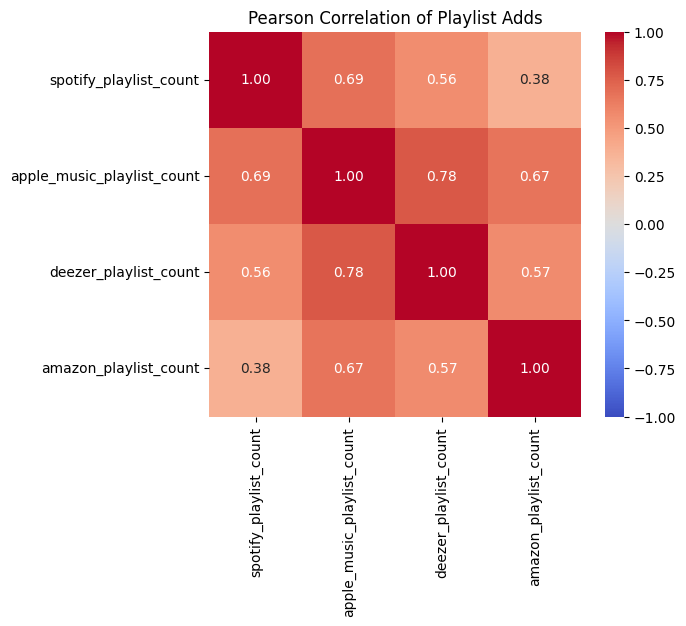

In [53]:
plt.figure(figsize=(6,5))
sns.heatmap(pearson_corr, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Pearson Correlation of Playlist Adds")
plt.show()

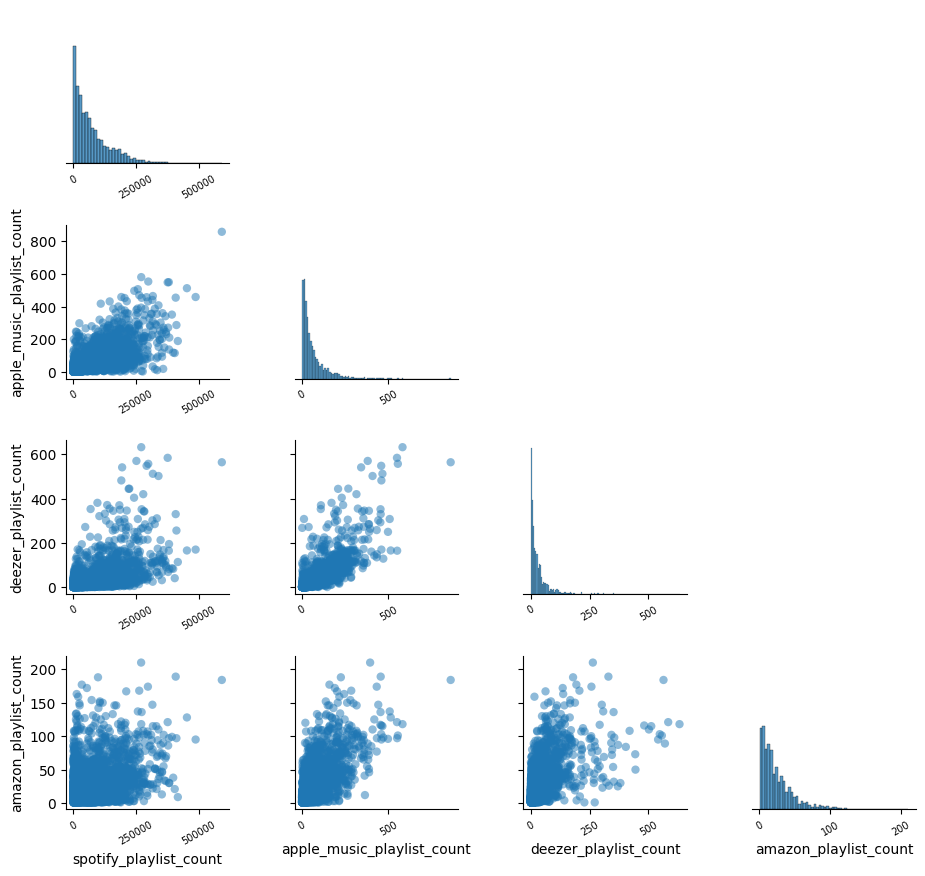

In [54]:
data = spotify_data[cols].replace(0, pd.NA).dropna()

g = sns.pairplot(
    data,
    kind='scatter',
    diag_kind='hist',
    plot_kws={'alpha': 0.5, 'edgecolor': 'none'},
    corner=True,
    height=2.5  
)

g.fig.subplots_adjust(bottom=0.15, left=0.1, right=0.95, top=0.95,
                      hspace=0.4, wspace=0.4)

for ax in g.axes.flatten():
    if ax is not None:
        ax.tick_params(axis='x', labelbottom=True)
        plt.setp(ax.get_xticklabels(), rotation=30, fontsize=7)

plt.show()

We select four playlist-add metrics - Spotify, Apple Music, Deezer and Amazon - and compute both Pearson and Spearman correlations to quantify how similarly users add tracks across these services. To visualize the connections, we plot a series of vertical scatter plots - one per service‑pair - annotated with the $Pearson \space r$ in the title.

1. Spotify vs. Apple Music - Points trend upward diagonally. This means that songs that rack up many playlist‑adds on Spotify also tend to get heavily added on Apple Music. This strong positive relationship (Pearson r = 0.69) suggests a shared "hit potential" between the two largest streaming platforms.
2. Spotify vs. Deezer - A clear positive slope - while not as tight as Spotify-Apple, there's a solid mid‑range correlation. Hits on Spotify often gain traction on Deezer as well.
3. Spotify vs. Amazon Music - A gentle upward trend - some spillover exists, but Amazon's audience and playlist behavior only partly mirror Spotify's.
4. Apple Music vs. Deezer - A very strong positive correlation - tracks popular on Apple Music are highly likely to be playlisted on Deezer too.
5. Apple Music vs. Amazon Music - A solid positive relationship - Apple Music success often mirrors success on Amazon.
6. Deezer vs. Amazon Music - With a moderate positive trend, this pairing indicates that while Deezer hits often make it onto Amazon playlists, the relationship is looser than Apple-Deezer but stronger than Spotify-Amazon, reflecting a mid‑level overlap.

Overall:

Most tightly linked: Apple Music & Deezer (r = 0.78)

Strong connections: Spotify-Apple (0.69) and Apple-Amazon (0.67)

Moderate ties: Deezer-Amazon (0.57) and Spotify-Deezer (0.56)

Weakest link: Spotify-Amazon (0.38)

The strongest correlation occurs between Apple Music and Deezer, indicating that tracks resonating with Apple's audience almost invariably find their way onto Deezer playlists. Close behind are Spotify - Apple Music and Apple Music - Amazon Music, showing the shared "hit potential" among the largest streaming services. Deezer - Amazon Music and Spotify - Deezer exhibit moderate positive relationships, reflecting meaningful but less universal overlap. Finally, Spotify - Amazon Music shows the weakest link, suggesting distinct listener behaviors on Amazon's platform.

### Problem 7. YouTube views and likes (1 point)
What is the relationship between YouTube views and likes? Present an appropriate plot. 

What is the mean YouTube views-to-likes ratio? What is its distribution? Find a way to plot it and describe it.

In [55]:
mask = (spotify_data['youtube_views'] > 0) & (spotify_data['youtube_likes'] > 0)
x = spotify_data.loc[mask, 'youtube_views']
y = spotify_data.loc[mask, 'youtube_likes']

correlation = x.corr(y)
correlation

np.float64(0.8338970218433367)

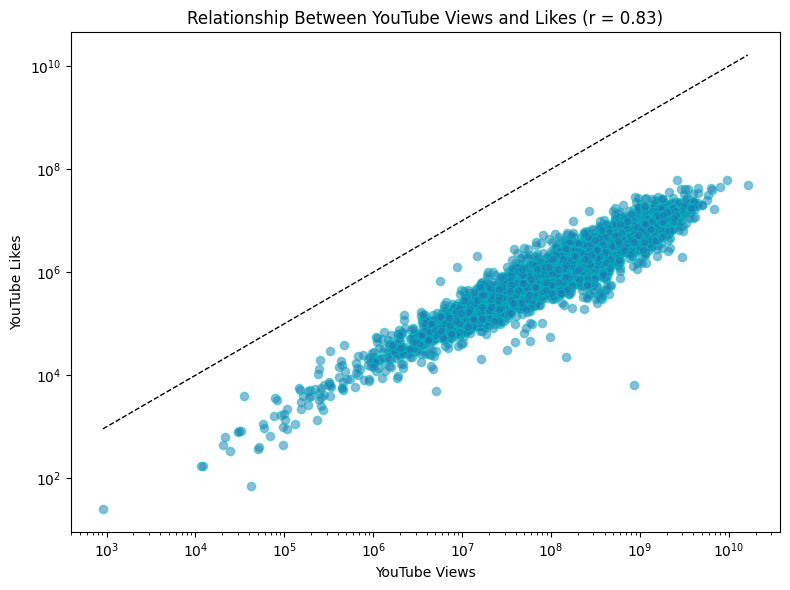

In [56]:
plt.figure(figsize=(8, 6))
minv, maxv = x.min(), x.max()
plt.plot([minv, maxv], [minv, maxv], 'k--', linewidth=1)
plt.scatter(x, y, alpha=0.5, edgecolor='c')
plt.title(f'Relationship Between YouTube Views and Likes (r = {correlation:.2f})')
plt.xlabel('YouTube Views')
plt.ylabel('YouTube Likes')
plt.xscale('log')
plt.yscale('log')
plt.tight_layout()
plt.show()

This log-log scatter plot charts each track's total YouTube views against its like count. The strong upward trend-even after logging both axes-confirms that videos with more views tend to attract proportionally more likes (simple logic).

In [57]:
ratio = spotify_data.youtube_views / spotify_data.youtube_likes

ratio = ratio.replace([np.inf, -np.inf], np.nan).dropna()

ratio

0        49.193553
1         33.36844
2         55.00851
3       103.115892
4        21.081742
           ...    
4595    106.789364
4596    176.507395
4597      185.8951
4598    289.130238
4599    226.375612
Length: 4285, dtype: Float64

In [58]:
log_ratio = np.log10(ratio)

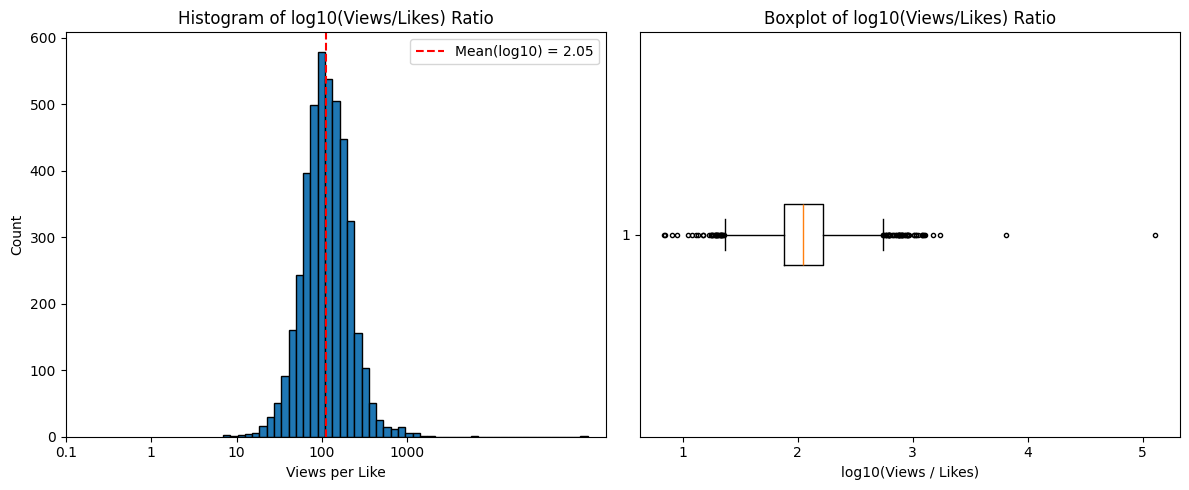

In [59]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].hist(log_ratio, bins=50, edgecolor='black')
axes[0].axvline(log_ratio.mean(), color='red', linestyle='--', label=f'Mean(log10) = {log_ratio.mean():.2f}')
axes[0].set_title('Histogram of log10(Views/Likes) Ratio')


axes[0].set_xticks([-1, 0, 1, 2, 3])
axes[0].set_xticklabels([0.1, 1, 10, 100, 1000])
axes[0].set_xlabel('Views per Like')

axes[0].set_ylabel('Count')

axes[0].legend()

axes[1].boxplot(log_ratio, vert=False, flierprops=dict(marker='o', markersize=3))
axes[1].set_title('Boxplot of log10(Views/Likes) Ratio')
axes[1].set_xlabel('log10(Views / Likes)')

plt.tight_layout()
plt.show()

When we plot the log10 of the YouTube views‑to‑likes ratio, we see a right‑skewed but fairly narrow distribution centered near 2.0 (100 views per like). The bulk of songs lie between 50 and 200 views per like (log10 between 1.7 and 2.3). A handful of outliers exceed 300 views per like, indicating content that amazes views much faster than it attracts likes, perhaps due to passive or autoplay listening. Very few songs have ratios below 10 views per like, suggesting that most viewers do click "like" at a consistent rate across a wide range of popular tracks.

### Problem 8. TikTok stuff (2 points)
The most popular songs on TikTok released every year show... interesting behavior. Which years peaked the most TikTok views? Show an appropriate chart. Can you explain this behavior? For a bit of context, TikTok was created in 2016.

Now, how much popular is the most popular song for each release year, than the mean popularity? Analyze the results.

In both parts, it would be helpful to see the actual songs.

In [60]:
spotify_data['release_year'] = spotify_data.release_date.dt.year

droppedNA = spotify_data.dropna(subset=['tiktok_views'])
peak_views = droppedNA.groupby('release_year').tiktok_views.max()
peak_views

release_year
1987       673282408
1991       720283921
1994     15963128797
1998       803719645
1999       226008149
2000       771015965
2001       167032445
2002       481408577
2003      1394903550
2004      1599320816
2005    214843956590
2006      1795501997
2007      2202590339
2008      2238389974
2009      3323603337
2010      5938511405
2011    233232311463
2012      3172500312
2013     17759263793
2014     11018922699
2015      6577639193
2016     14808888629
2017     22241102823
2018     38373644011
2019     61088562861
2020     33359398879
2021     23712377029
2022     33870791454
2023     14603725994
2024      6518604175
Name: tiktok_views, dtype: Int64

In [61]:
peak_idx = droppedNA.groupby('release_year').tiktok_views.idxmax()
peak_songs = droppedNA.loc[peak_idx, ['release_year','track','artist','tiktok_views']].set_index('release_year')
peak_songs

,track,artist,tiktok_views
release_year,,,
1987,Sweet Child O' Mine,Guns N' Roses,673282408
1991,Smells Like Teen Spirit,Nirvana,720283921
1994,All I Want for Christmas Is You,Mariah Carey,15963128797
1998,Beautiful Girls,Sean Kingston,803719645
1999,Californication,Red Hot Chili Peppers,226008149
2000,The Real Slim Shady,Eminem,771015965
2001,Over the Rainbow,Israel Kamakawiwo'ole,167032445
2002,The Scientist,Coldplay,481408577
2003,Seven Nation Army,The White Stripes,1394903550


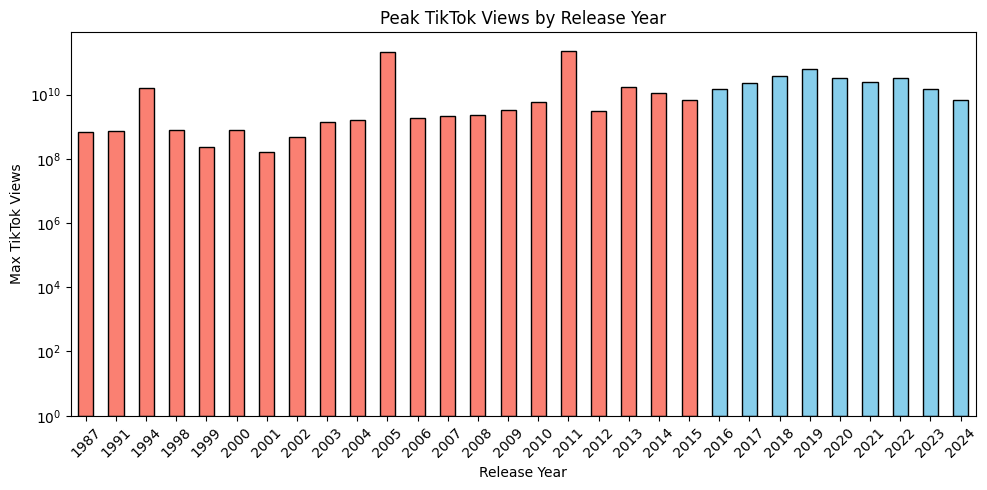

In [62]:
plt.figure(figsize=(10, 5))
colors = ['salmon' if yr < 2016 else 'skyblue' for yr in peak_views.index]
peak_views.plot(kind='bar', color=colors, edgecolor='black', log=True)
plt.title('Peak TikTok Views by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Max TikTok Views')
plt.xticks(rotation=45)
plt.yscale('log')
plt.tight_layout()
plt.show()

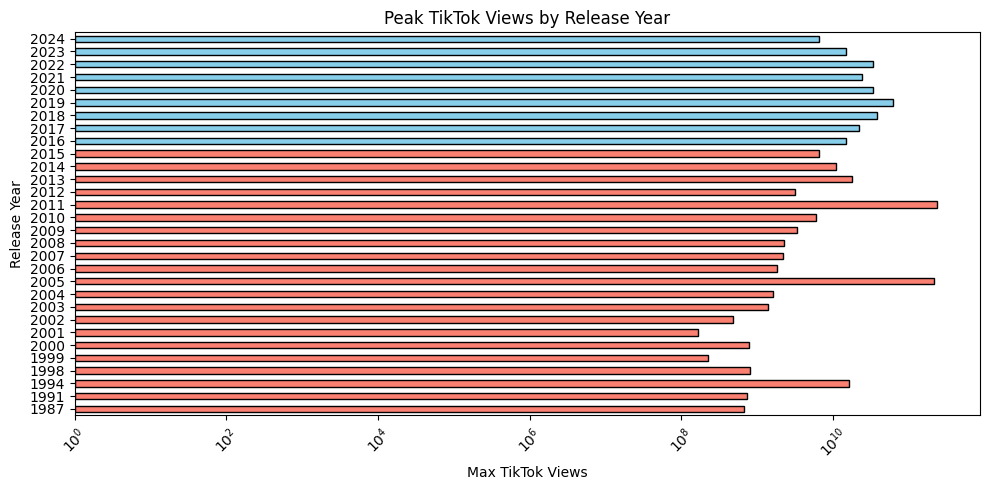

In [63]:
plt.figure(figsize=(10, 5))
colors = ['salmon' if yr < 2016 else 'skyblue' for yr in peak_views.index]
peak_views.plot(kind='barh', color=colors, edgecolor='black', log=True)
plt.title('Peak TikTok Views by Release Year')
plt.xlabel('Max TikTok Views')
plt.ylabel('Release Year')
plt.xticks(rotation=45)
plt.xscale('log')
plt.tight_layout()
plt.show()

Pre‑2016 songs (before TikTok's launch) still appear because legacy tracks like Mariah Carey's "All I Want for Christmas Is You" (1994) and Guns N' Roses' "Sweet Child O' Mine" (1987) were repurposed in viral TikTok trends, giving them massive view spikes. Post‑2016 releases show a clear rise in peak views starting around 2017, reflecting TikTok's rapid growth and its power to propel newer tracks to viral status. Recent years (2022-2024) have lower peaks simply because those songs haven’t had as much time to amass views, but we expect their peaks to climb as the platform continues to grow. 2011 shows a great peak worth checking:

In [64]:
peak_2011_index = spotify_data[spotify_data.release_year == 2011].tiktok_views.idxmax()
peak_2011_song = spotify_data.loc[peak_2011_index, ['release_year', 'track', 'artist', 'tiktok_views']]
peak_2011_song

release_year                        2011
track           Monkeys Spinning Monkeys
artist                     Kevin MacLeod
tiktok_views                233232311463
Name: 1024, dtype: object

The data shows that the 2011 peak in TikTok views comes from "Monkeys Spinning Monkeys" by Kevin MacLeod, with approximately 233 billion views. Kevin MacLeod's instrumental tracks (like this one) are royalty-free and widely used across the internet, including TikTok, for memes, background scores, and challenges. It isn't a mainstream commercial single but a piece of stock music that became a meme favorite.

In [65]:
droppedNA = spotify_data.dropna(subset=['spotify_popularity'])
grouped = droppedNA.groupby('release_year').spotify_popularity
mean_pop = grouped.mean()
max_pop = grouped.max()
idx_maxpop = grouped.idxmax()
top_songs = droppedNA.loc[idx_maxpop, ['release_year', 'track', 'artist', 'spotify_popularity']].set_index('release_year')
top_songs

,track,artist,spotify_popularity
release_year,,,
1987,Sweet Child O' Mine,Guns N' Roses,80.0
1991,Smells Like Teen Spirit,Nirvana,77.0
1994,All I Want for Christmas Is You,Mariah Carey,60.0
1998,Beautiful Girls,Sean Kingston,72.0
1999,Californication,Red Hot Chili Peppers,79.0
2000,In the End,Linkin Park,82.0
2001,Over the Rainbow,Israel Kamakawiwo'ole,68.0
2002,Without Me,Eminem,83.0
2003,Seven Nation Army,The White Stripes,81.0


In [66]:
pop_summary = pd.DataFrame({
    'mean_popularity': mean_pop,
    'max_popularity': max_pop
})
pop_summary['difference'] = pop_summary['max_popularity'] - pop_summary['mean_popularity']

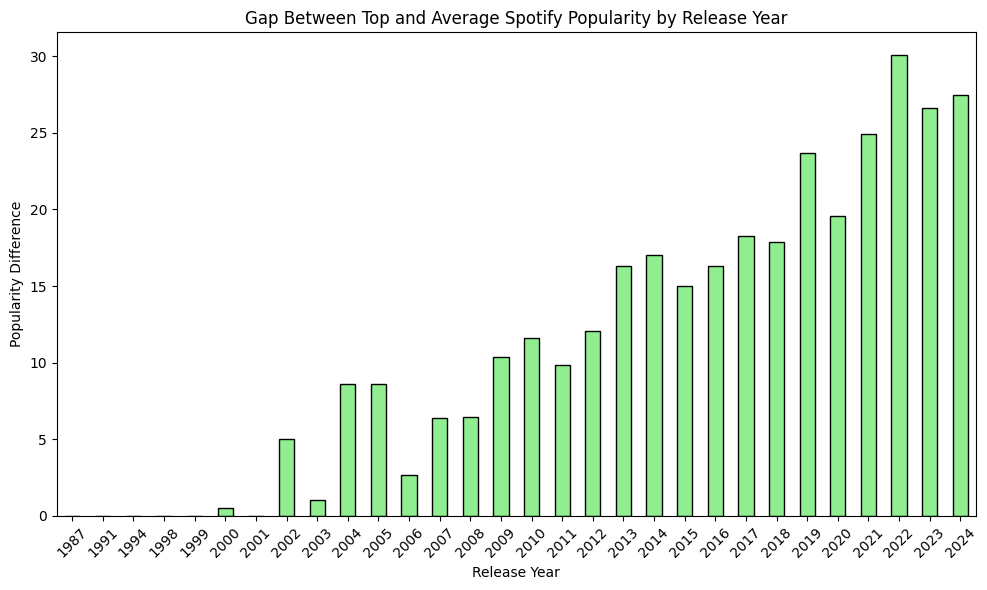

In [67]:
plt.figure(figsize=(10, 6))
pop_summary['difference'].sort_index().plot(
    kind='bar', 
    color='lightgreen', edgecolor='black'
)
plt.title('Gap Between Top and Average Spotify Popularity by Release Year')
plt.ylabel('Popularity Difference')
plt.xlabel('Release Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

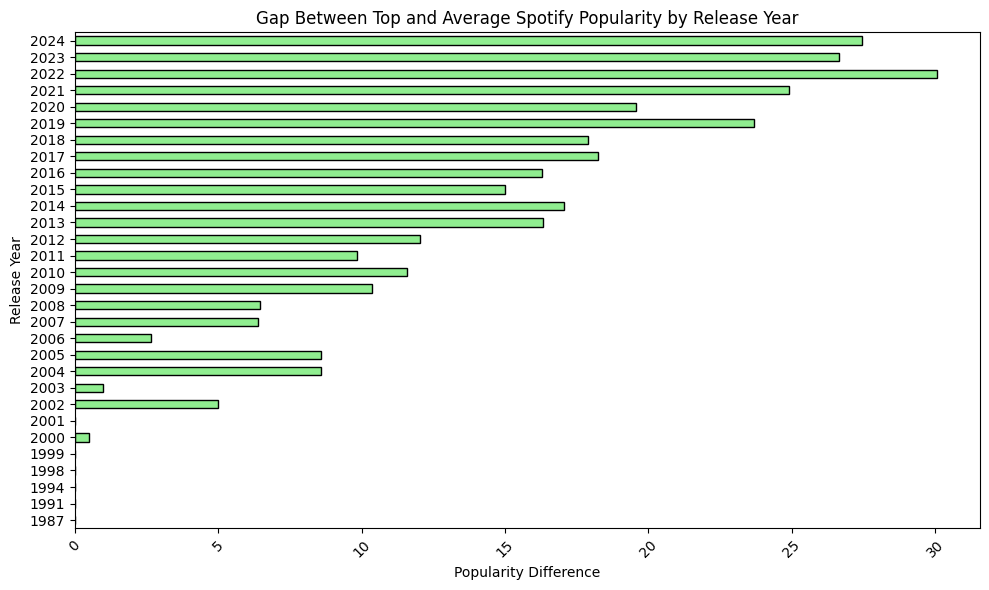

In [68]:
plt.figure(figsize=(10, 6))
pop_summary['difference'].sort_index().plot(
    kind='barh', 
    color='lightgreen', edgecolor='black'
)
plt.title('Gap Between Top and Average Spotify Popularity by Release Year')
plt.xlabel('Popularity Difference')
plt.ylabel('Release Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The bar chart above shows the gap between each year's most popular song and the average popularity of all songs from that year. 2019-2022 have the largest gaps (20-30 points), indicating runaway hits (e.g. 2019's top track outscored its peers by 24 points on Spotify's 0-100 scale). Early years (pre-2005) show small gaps (<10 points), reflecting the absence of strong streaming-era singles. 1987, 1991, 1994, 1998, 1999 top songs (displayed below) have popularity scores of 80, 77, 60, 72, 79 respectively, modestly above their cohorts (e.g. Sweet Child O' Mine, All I Want for Christmas Is You, Californication). Recent years like 2022 peak at a 30-point gap, driven by mega hits like End of Beginning.

### * Problem 9. Explore (and clean) at will
There is a lot to look for here. For example, you can easily link a song to its genres, and lyrics. You may also try to link artists and albums to more info about them. Or you can compare and contrast a song's performance across different platforms, in a similar manner to what you already did above; maybe even assign a better song ranking system (across platforms with different popularity metrics, and different requirements) than the one provided in the dataset.

In [69]:
spotify_data.columns

Index(['track', 'album_name', 'artist', 'release_date', 'isrc',
       'all_time_rank', 'track_score', 'spotify_streams',
       'spotify_playlist_count', 'spotify_playlist_reach',
       'spotify_popularity', 'youtube_views', 'youtube_likes', 'tiktok_posts',
       'tiktok_likes', 'tiktok_views', 'youtube_playlist_reach',
       'apple_music_playlist_count', 'airplay_spins', 'siriusxm_spins',
       'deezer_playlist_count', 'deezer_playlist_reach',
       'amazon_playlist_count', 'pandora_streams', 'pandora_track_stations',
       'soundcloud_streams', 'shazam_counts', 'explicit_track',
       'release_year'],
      dtype='object')

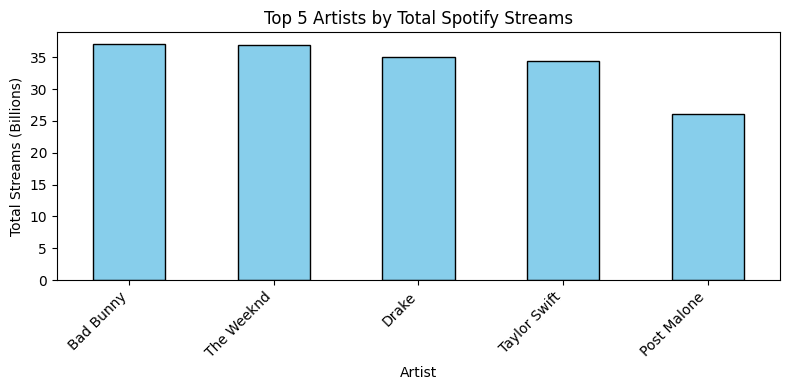

In [70]:
artist_totals = spotify_data.groupby('artist')['spotify_streams'].sum().nlargest(5)
artist_totals_b = artist_totals / 1000000000
artist_totals_b.plot(kind='bar', figsize=(8,4), color='skyblue', edgecolor='black')

plt.title('Top 5 Artists by Total Spotify Streams')
plt.ylabel('Total Streams (Billions)')
plt.xlabel('Artist')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

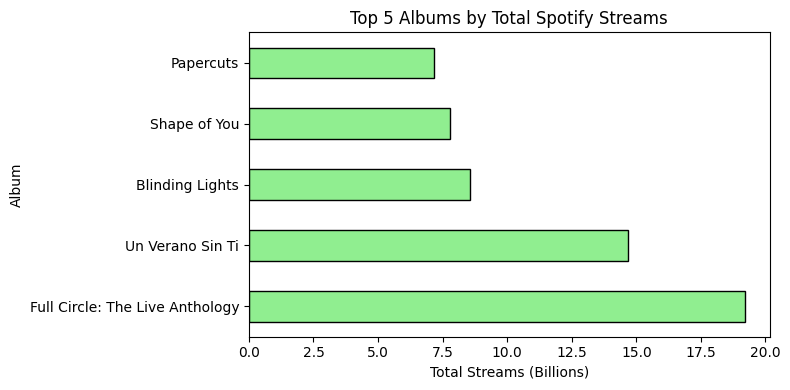

In [71]:
album_totals = spotify_data.groupby('album_name').spotify_streams.sum().nlargest(5)
album_totals_b = album_totals / 1000000000
album_totals_b.plot(kind='barh', figsize=(8,4), color='lightgreen', edgecolor='black')

plt.title('Top 5 Albums by Total Spotify Streams')
plt.xlabel('Total Streams (Billions)')
plt.ylabel('Album')
plt.tight_layout()
plt.show()

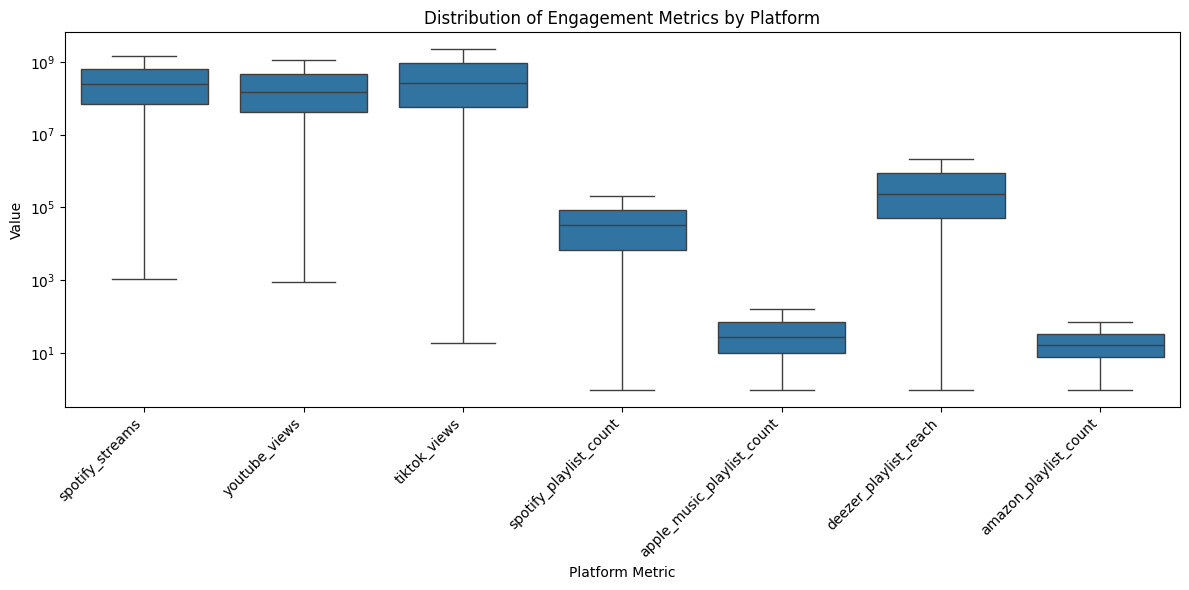

In [72]:
metrics = [
    'spotify_streams',
    'youtube_views',
    'tiktok_views',
    'spotify_playlist_count',
    'apple_music_playlist_count',
    'deezer_playlist_reach',
    'amazon_playlist_count'
]

meltedData = spotify_data[metrics].melt(var_name='platform', value_name='value')

plt.figure(figsize=(12,6))
sns.boxplot(x='platform', y='value', data=meltedData, showfliers=False)
plt.yscale('log')
plt.title('Distribution of Engagement Metrics by Platform')
plt.xlabel('Platform Metric')
plt.ylabel('Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

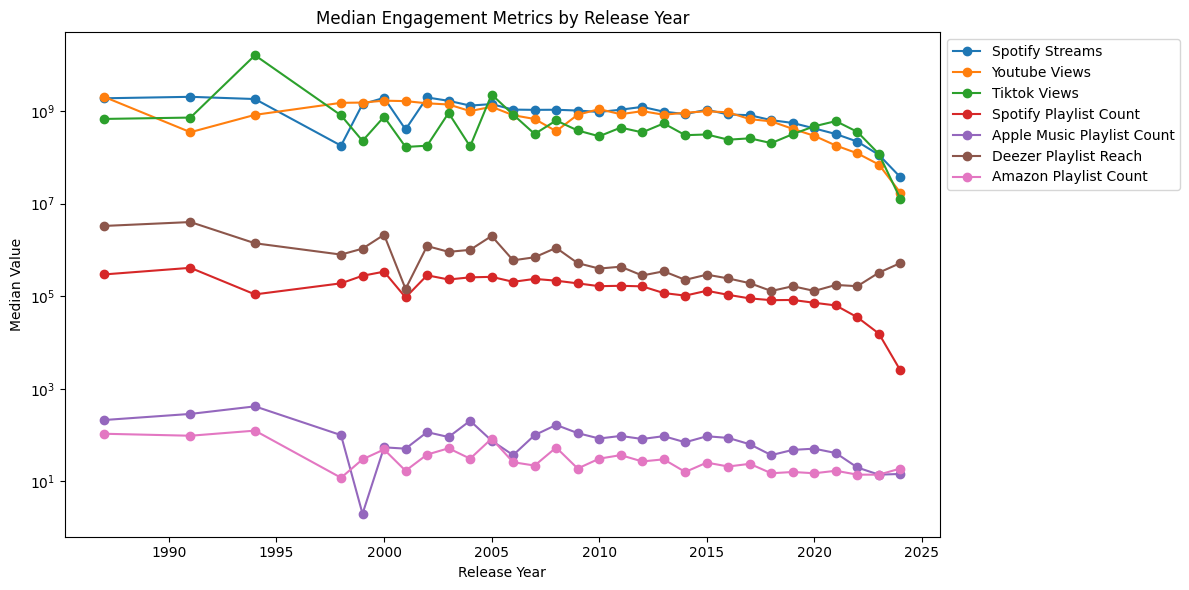

In [73]:
medians = spotify_data.groupby('release_year')[metrics].median()

plt.figure(figsize=(12,6))

for col in metrics:
    plt.plot(medians.index, medians[col], marker='o', label=col.replace('_', ' ').title())
    
plt.yscale('log')
plt.title('Median Engagement Metrics by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Median Value')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()

We've seen there are countless ways for understanding a song's impact. Each approach shows a different facet of popularity: legacy tracks surfacing on TikTok, superstar "all‑rounders" dominating multiple services and platform‑specific quirks that single out hits. By combining year‑over‑year trends, cross‑platform comparisons, and targeted visualizations, we gain a multi‑dimensional view of what makes a song truly resonate.